### EDA

In [1]:
import pandas as pd

In [2]:
final_combined_data_cleaned = pd.read_excel('6. final_dataset.xlsx')

##### Descriptive Statistics: Get the summary statistics (mean, std, min, max, etc.) for numerical columns to understand the central tendency and spread.

In [3]:
final_combined_data_cleaned.describe()

,year,pH,EC,Phosphorus,Potassium,OM,Urea1,Urea2,Urea3,Urea4,...,sunshine_duration,rain_sum,precipitation_hours,wind_speed_10m_max,wind_gusts_10m_max,wind_direction_10m_dominant,shortwave_radiation_sum,et0_fao_evapotranspiration_sum,Yield,Sown
count,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,...,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.0
mean,2018.999810,5.635805,0.098332,15.964957,105.829481,3.396024,7.058617,12.663448,10.411375,5.906555,...,34197.199533,1116.408963,1561.725331,16.426490,37.498784,182.211909,3412.442462,729.410632,3651.885028,1.0
std,2.581915,1.056754,0.107890,17.189961,75.371909,3.186679,4.355157,7.162423,5.978502,3.189126,...,1952.344023,484.582833,680.266910,4.324140,6.793477,53.259205,216.003701,96.498502,735.749061,0.0
min,2015.000000,3.000000,0.001000,0.000000,0.100000,0.010000,0.048000,0.084000,0.070000,0.048000,...,26952.864153,141.900000,286.000000,7.441530,23.879670,58.666667,2795.310000,505.690000,1757.875000,1.0
25%,2017.000000,4.800000,0.040000,6.300000,53.000000,1.600000,4.280000,7.176000,5.950000,3.944000,...,32975.177104,797.300000,1095.000000,13.599454,32.596154,126.851648,3264.830000,672.770000,3093.796969,1.0
50%,2019.000000,5.400000,0.070000,11.300000,84.500000,2.500000,6.475000,12.804000,10.406000,5.656000,...,34095.727650,1074.000000,1407.000000,15.763934,36.817582,200.202186,3394.850000,707.207500,3565.853881,1.0
75%,2021.000000,6.500000,0.120000,18.200000,137.000000,4.000000,9.260000,18.216000,14.720000,8.208000,...,35572.449945,1422.650000,1906.500000,18.538798,42.091257,219.065574,3546.130000,754.960000,4156.499935,1.0
max,2023.000000,9.900000,1.635000,151.950000,534.000000,29.050000,20.000000,30.000000,26.000000,14.000000,...,39027.778251,3336.500000,3446.000000,29.768852,59.251913,280.879781,4024.710000,1085.700000,6073.440987,1.0


##### Checking for Missing Values: Ensure there are no missing values in the dataset.

In [4]:
final_combined_data_cleaned.isnull().sum()

year                              0
District                          0
season                            0
Condition                         0
pH                                0
EC                                0
Phosphorus                        0
Potassium                         0
OM                                0
Urea1                             0
Urea2                             0
Urea3                             0
Urea4                             0
TSP0                              0
MOP1                              0
MOP2                              0
MOP3                              0
temperature_2m_max                0
temperature_2m_min                0
temperature_2m_mean               0
daylight_duration                 0
sunshine_duration                 0
rain_sum                          0
precipitation_hours               0
wind_speed_10m_max                0
wind_gusts_10m_max                0
wind_direction_10m_dominant       0
shortwave_radiation_sum     

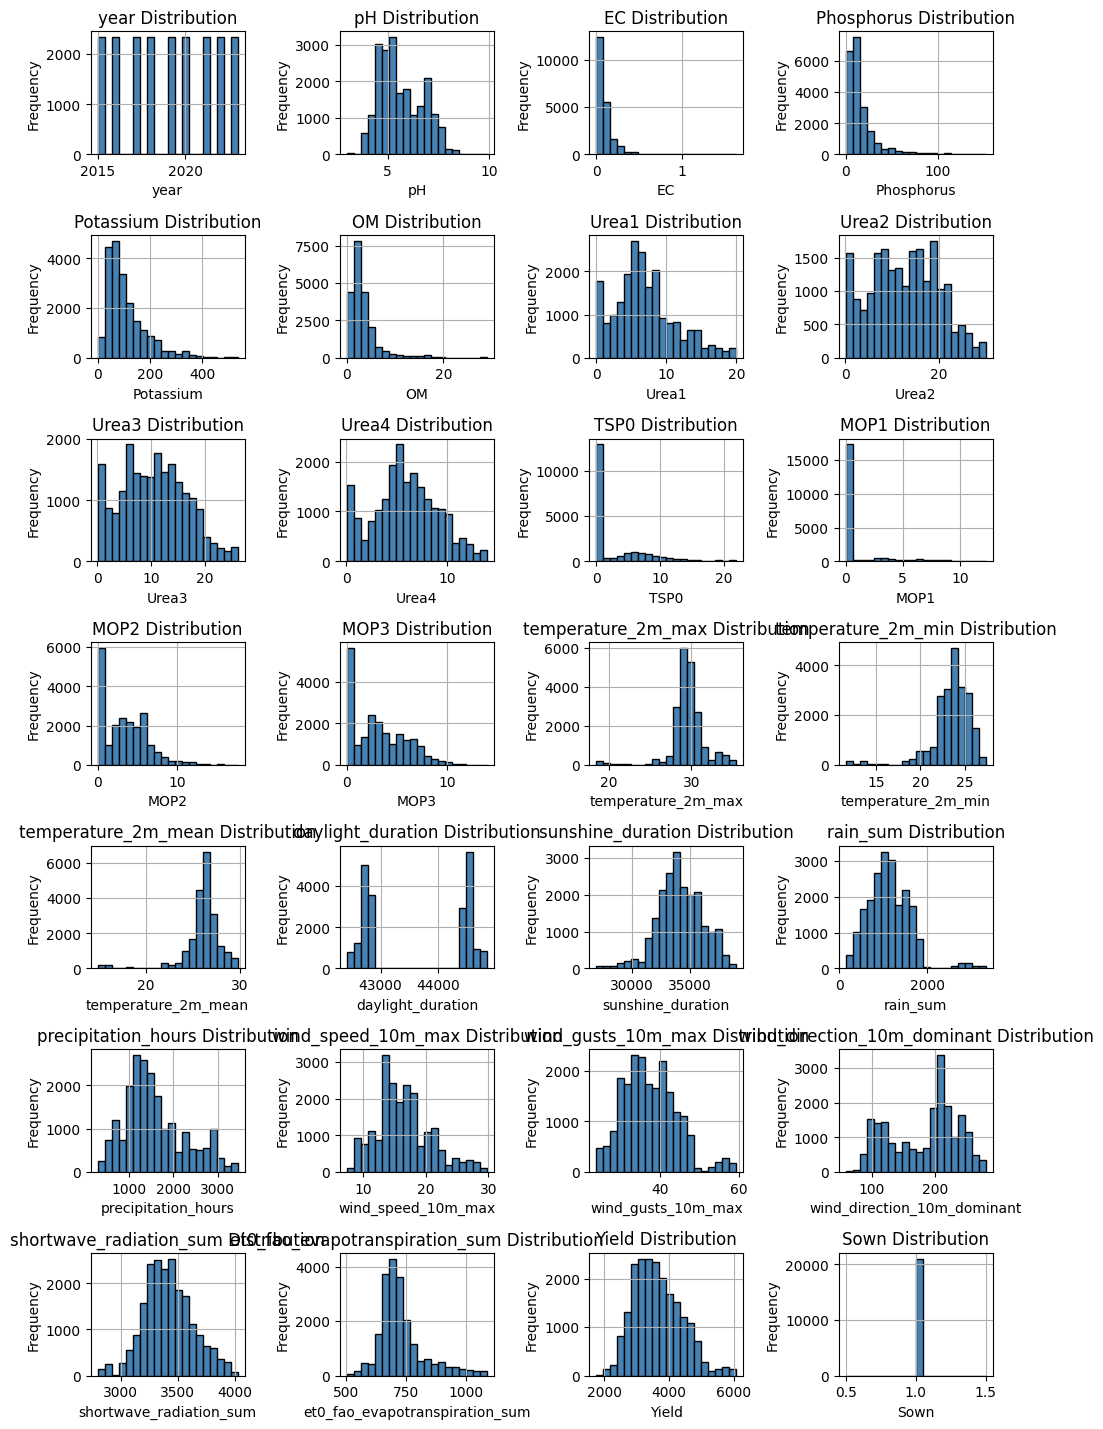

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

def showdist():
    numerical_columns = final_combined_data_cleaned.select_dtypes(include=[float, int])
    plt.figure(figsize=(10, 16))
    for i, col in enumerate(numerical_columns):
        plt.subplot(8, 4, i + 1)  # Fixed grid of 3x3
        final_combined_data_cleaned[col].hist(bins=20, color='steelblue', edgecolor='black')
        plt.title(f'{col} Distribution')
        plt.xlabel(col)
        plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

showdist()

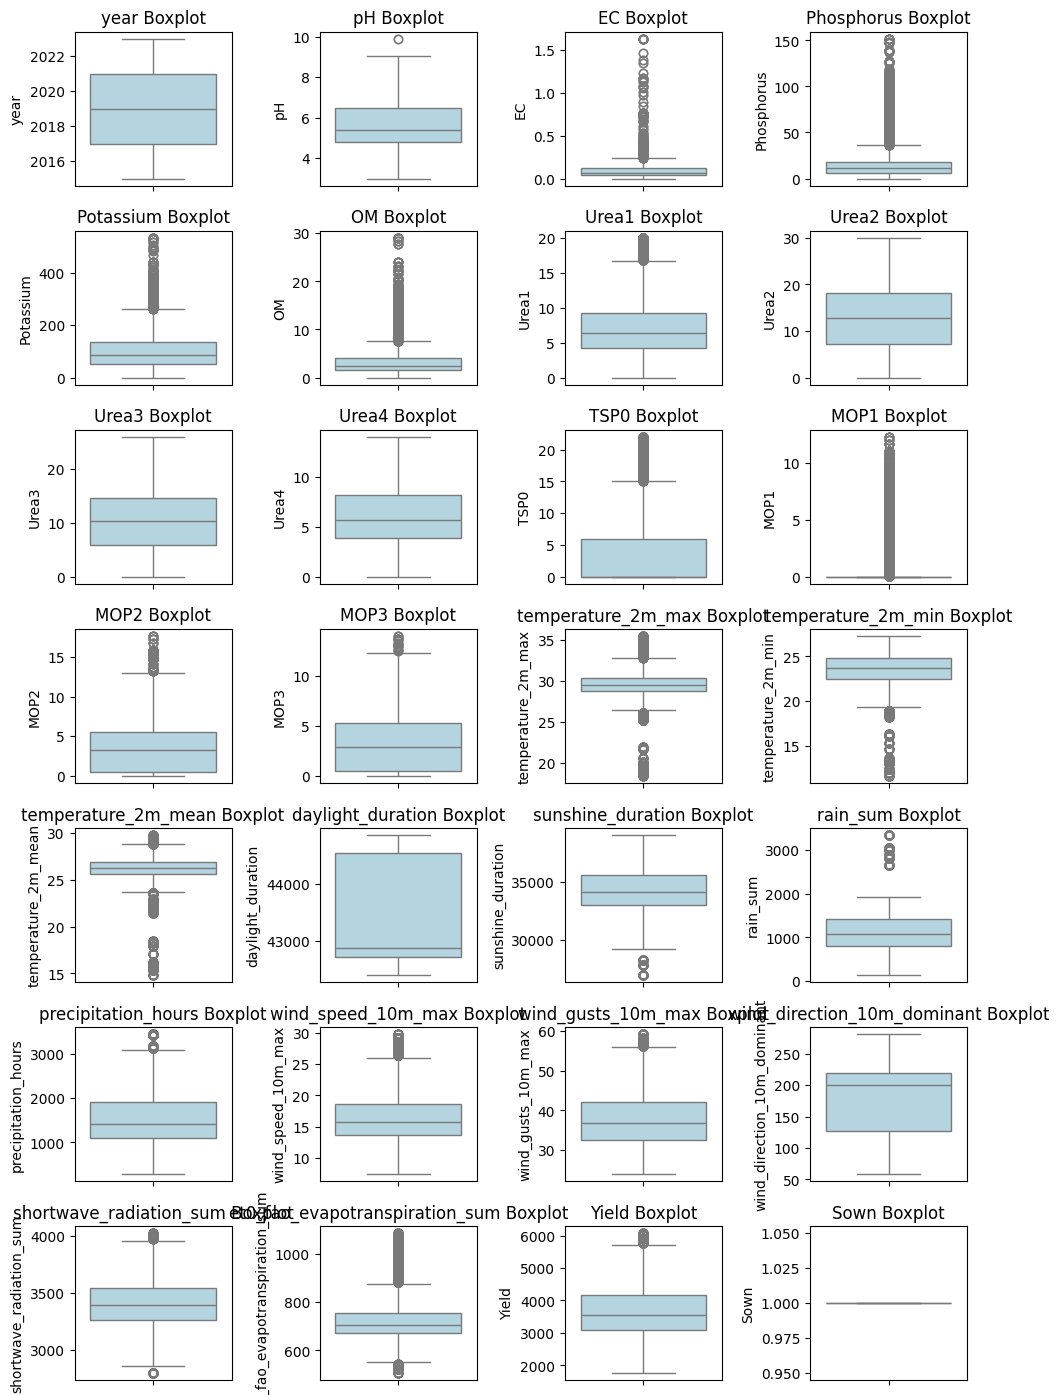

In [6]:
numerical_columns = final_combined_data_cleaned.select_dtypes(include=[float, int])

plt.figure(figsize=(10, 16))
for i, col in enumerate(numerical_columns):
    plt.subplot(8, 4, i + 1)  # Adjust the number of rows and columns as necessary
    sns.boxplot(y=final_combined_data_cleaned[col], color='lightblue')
    plt.title(f'{col} Boxplot')
plt.tight_layout()
plt.show()

##### Distribution of Target Variable (Yield): Plot the distribution of the target variable (Yield) to understand its skewness or potential outliers

### Corela

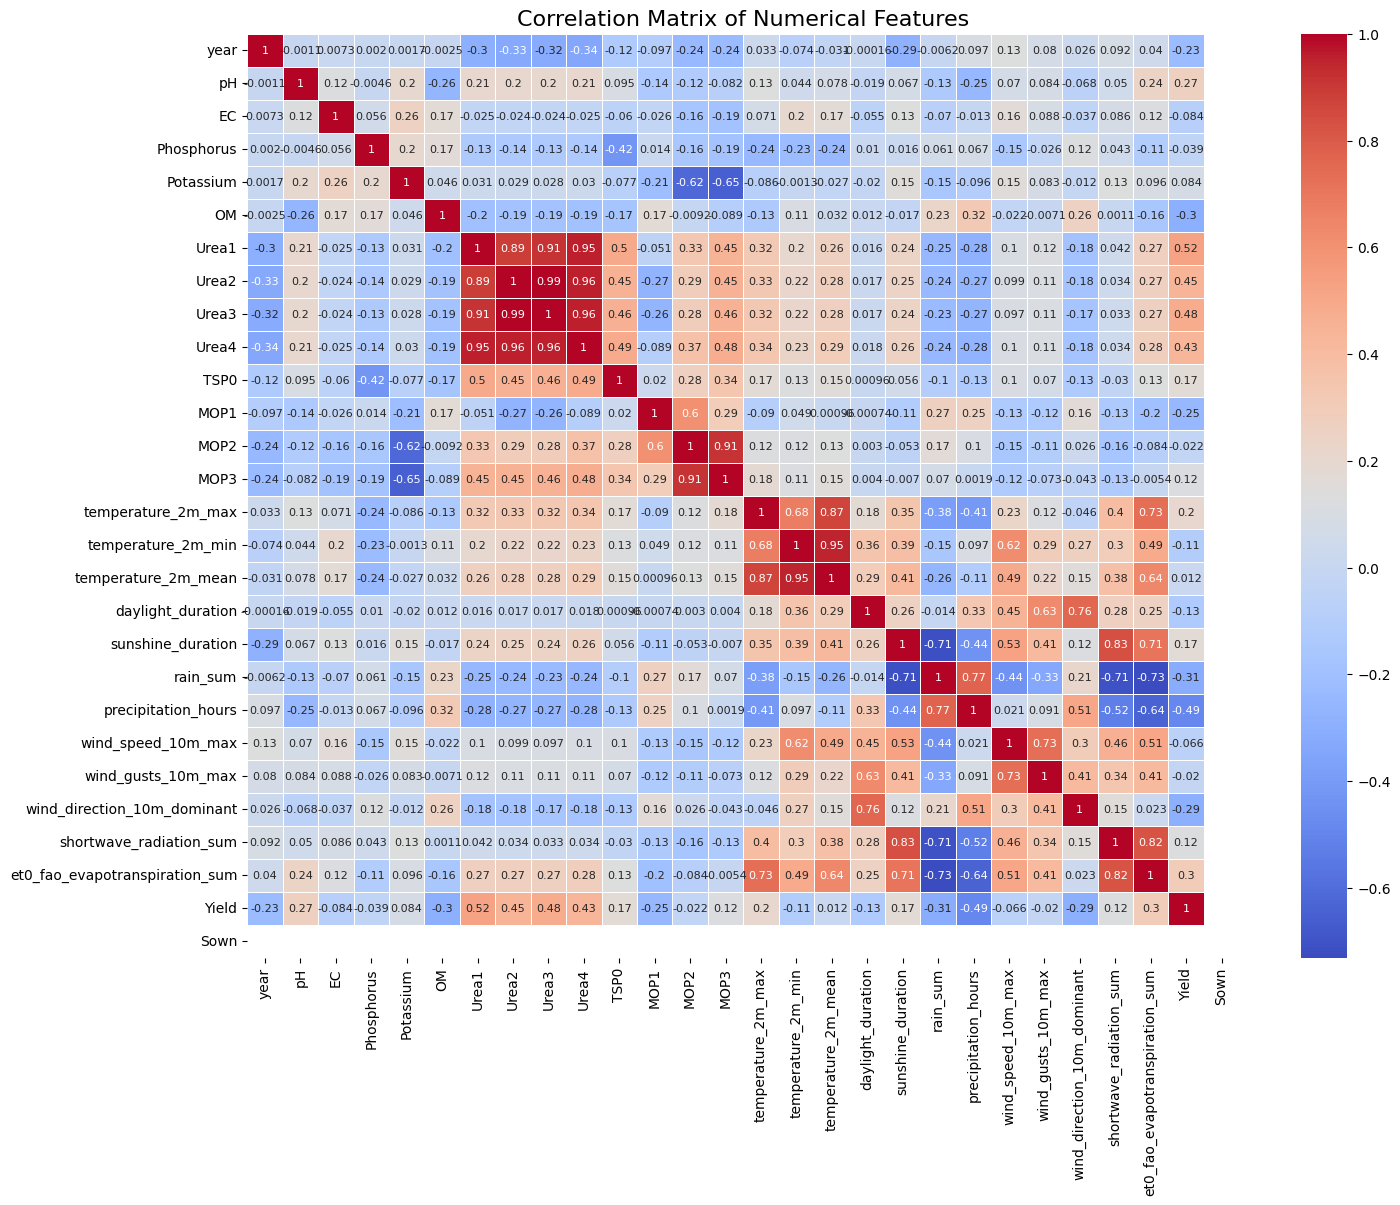

In [7]:
import numpy as np

# Selecting only the numeric columns
numeric_data = final_combined_data_cleaned.select_dtypes(include=[np.number])

# Now calculate the correlation matrix
correlation_matrix = numeric_data.corr()
import seaborn as sns
import matplotlib.pyplot as plt

# Re-generate the heatmap with improved clarity
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, annot_kws={"size": 8})
plt.title('Correlation Matrix of Numerical Features', fontsize=16)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

<Axes: title={'center': 'Average Yield Over Seasons'}, xlabel='year,season'>

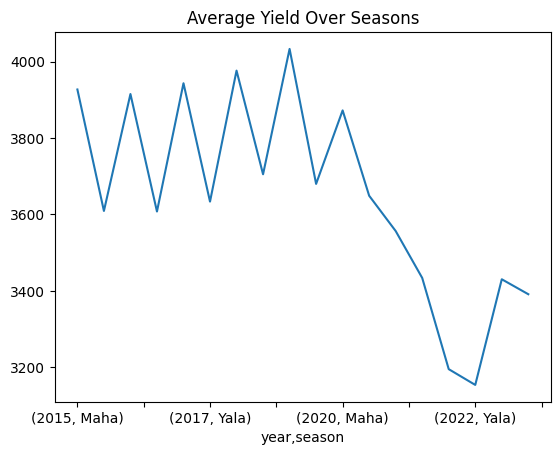

In [8]:
final_combined_data_cleaned.groupby(['year', 'season'])['Yield'].mean().plot(kind='line', title='Average Yield Over Seasons')

Random Forest with 100 estimators and max_depth=None
Train MAE: 0.3215110375016885, Test MAE: 0.8203484818431024
Train MSE: 6.5153849702108095, Test MSE: 27.89024800833874


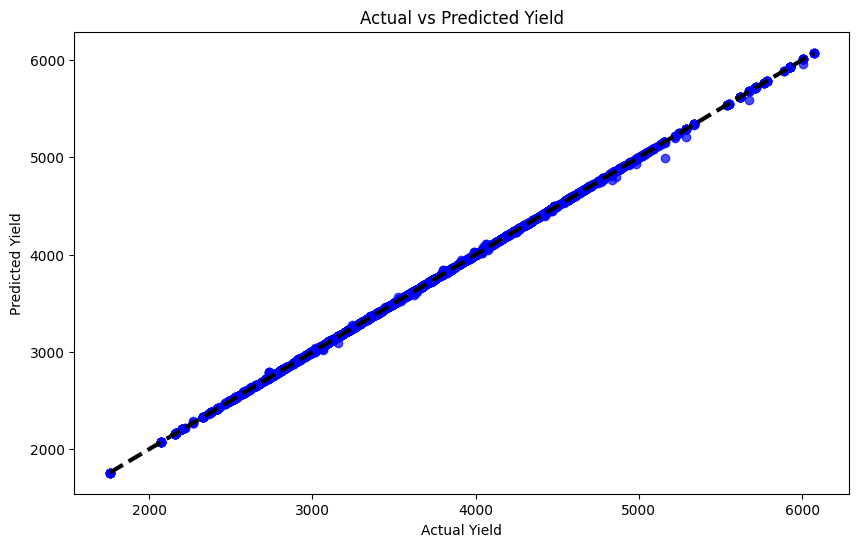

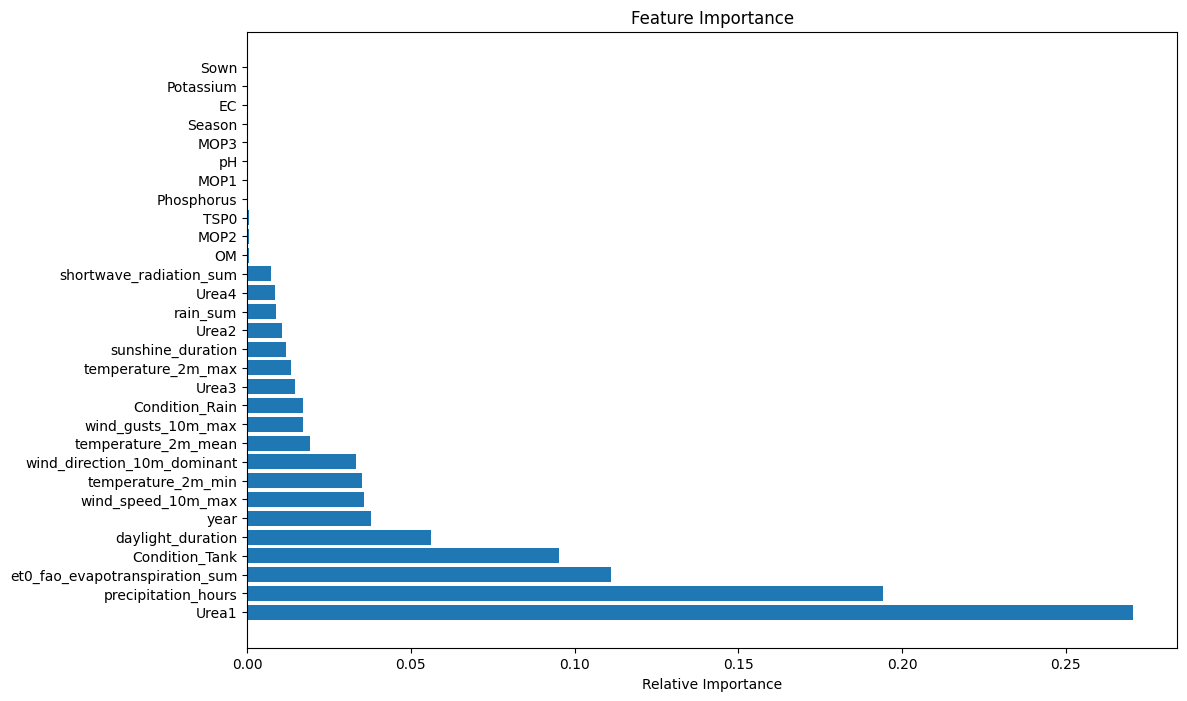

Random Forest with 200 estimators and max_depth=10
Train MAE: 54.699003475669905, Test MAE: 57.97200065431902
Train MSE: 7648.345888221988, Test MSE: 8309.031300543502


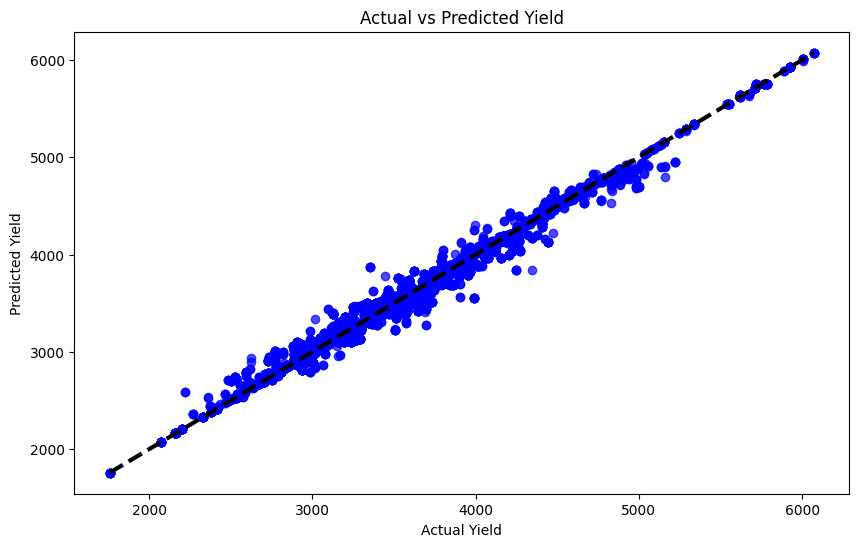

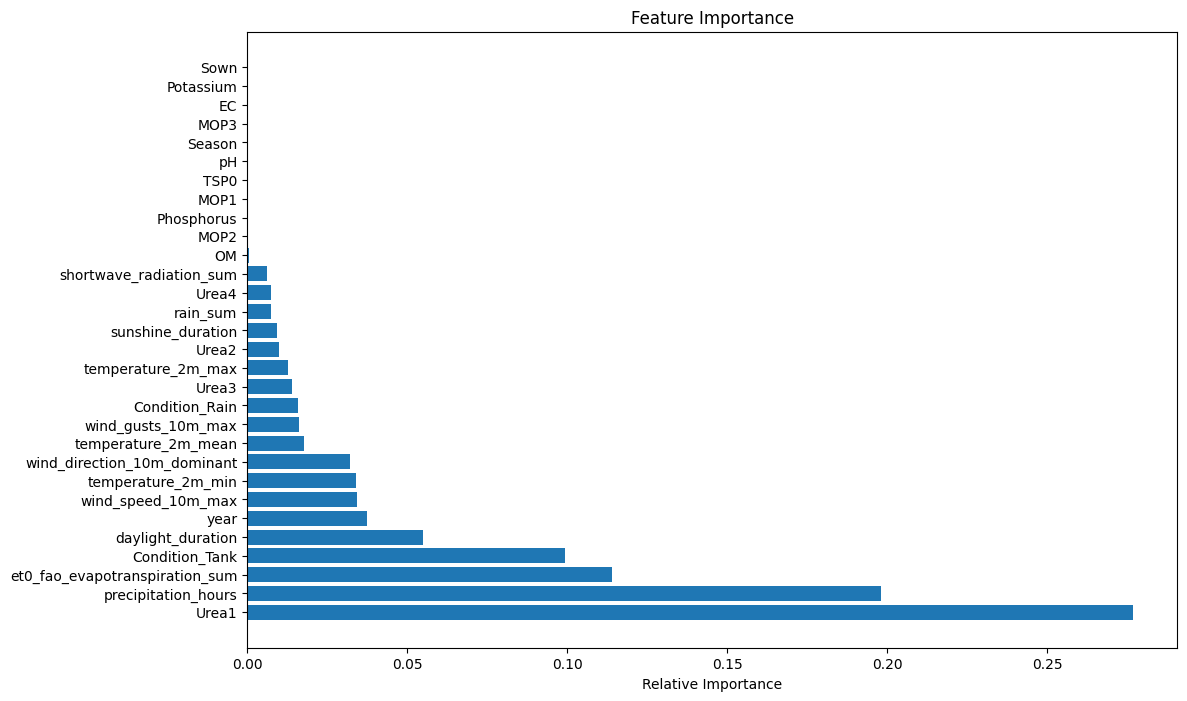

Random Forest with 200 estimators and max_depth=20
Train MAE: 0.3144826986553416, Test MAE: 0.7592695145107137
Train MSE: 4.281813999972675, Test MSE: 23.81332063564286


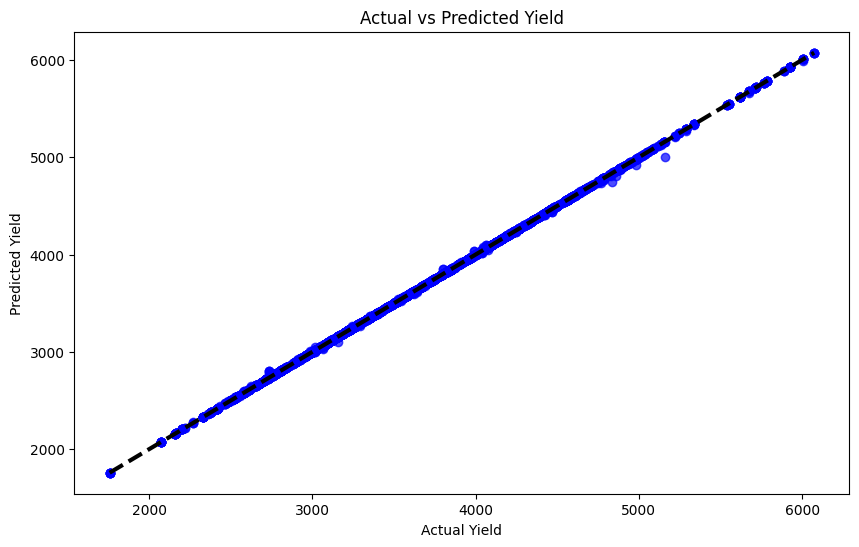

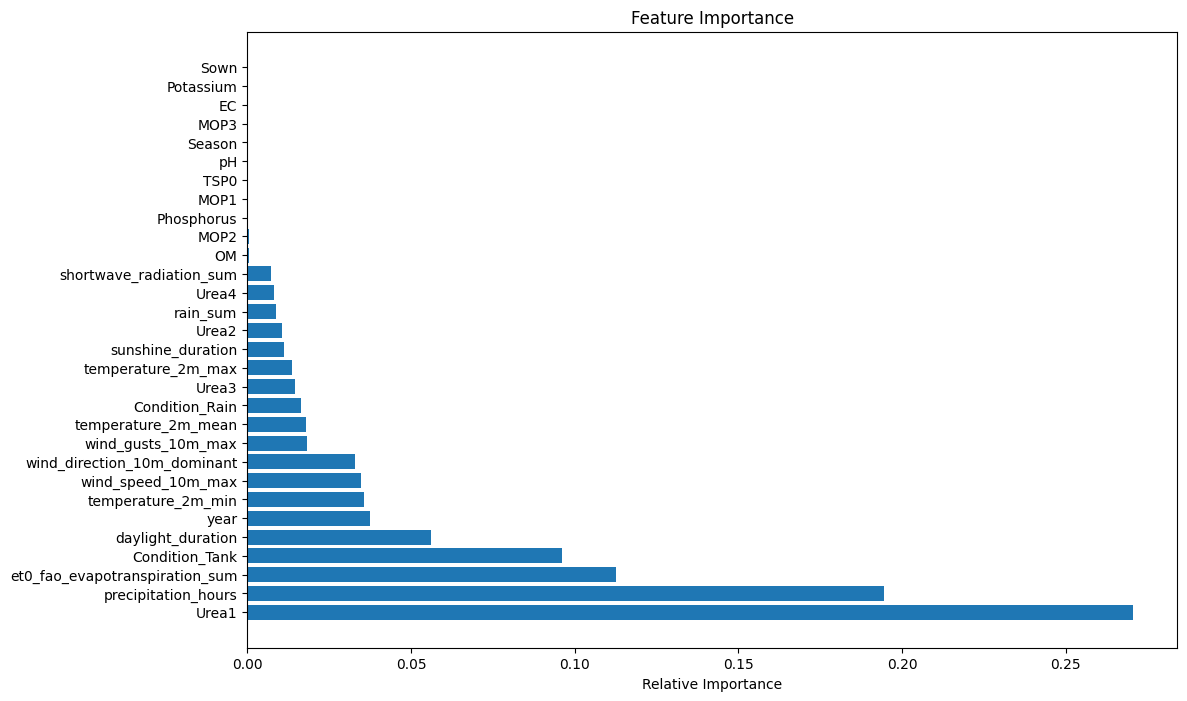

Random Forest with 300 estimators and max_depth=15
Train MAE: 3.1368322968896694, Test MAE: 3.7929267471208568
Train MSE: 66.22879969192046, Test MSE: 87.05241700840166


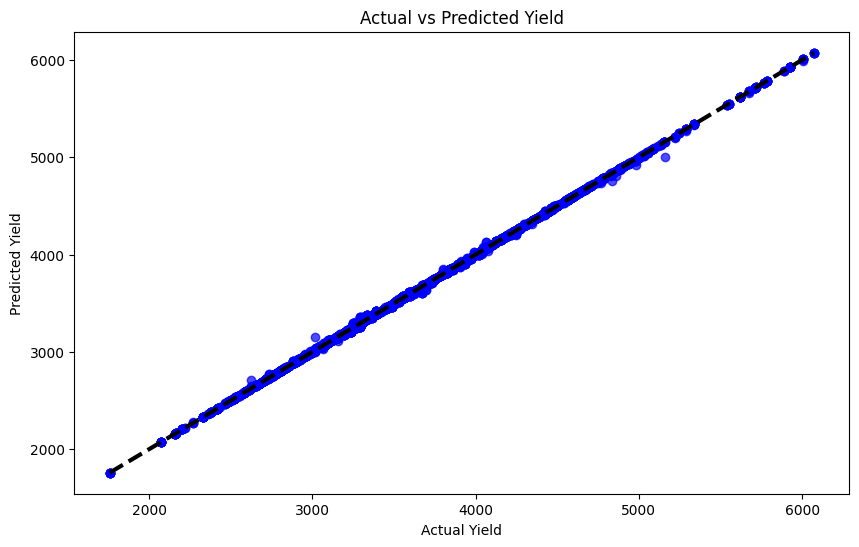

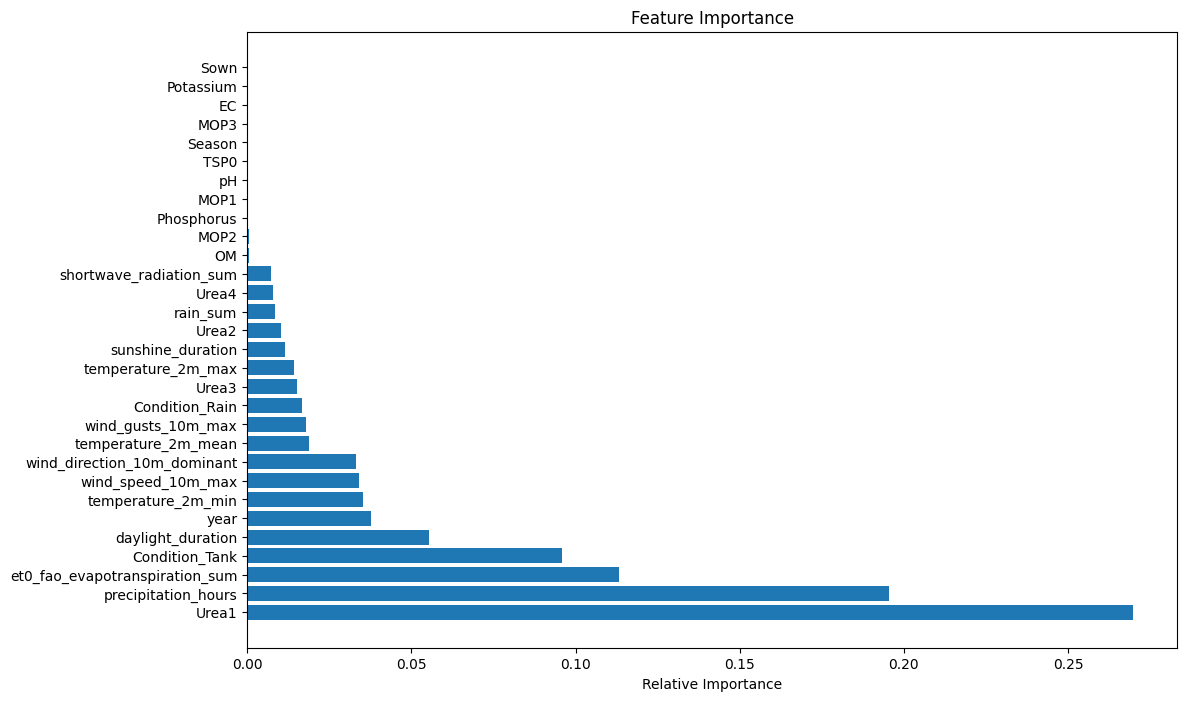

In [9]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Load your data (assuming the final_combined_data_cleaned is already loaded)
final_combined_data_cleaned = pd.read_excel('6. final_dataset.xlsx')

# Label encode 'Season' (since it has an order) and use Year directly
label_encoder = LabelEncoder()
final_combined_data_cleaned['Season'] = label_encoder.fit_transform(final_combined_data_cleaned['season'])

# One-Hot Encode 'District' and 'Condition' (since they have no order)
final_combined_data_encoded = pd.get_dummies(final_combined_data_cleaned, columns=['Condition'])

# Year can be used directly without any encoding
features = ['year', 'pH', 'EC', 'Phosphorus', 'Potassium', 'OM', 
            'Urea1', 'Urea2', 'Urea3', 'Urea4', 
            'TSP0', 'MOP1', 'MOP2', 'MOP3', 
            'temperature_2m_max', 'temperature_2m_min', 'temperature_2m_mean',
            'daylight_duration', 'sunshine_duration', 'rain_sum', 'precipitation_hours',
            'wind_speed_10m_max', 'wind_gusts_10m_max', 'wind_direction_10m_dominant',
            'shortwave_radiation_sum', 'et0_fao_evapotranspiration_sum', 
            'Season', 'Sown']

# Add the one-hot encoded columns for 'District' and 'Condition'
features.extend([col for col in final_combined_data_encoded.columns if col.startswith('Condition_')])

X = final_combined_data_encoded[features]
y = final_combined_data_encoded['Yield']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train Random Forest Regressor model
def train_random_forest(n_estimators, max_depth=None):
    rf = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
    rf.fit(X_train, y_train)
    
    y_train_pred = rf.predict(X_train)
    y_test_pred = rf.predict(X_test)
    
    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    
    print(f"Random Forest with {n_estimators} estimators and max_depth={max_depth}")
    print(f"Train MAE: {train_mae}, Test MAE: {test_mae}")
    print(f"Train MSE: {train_mse}, Test MSE: {test_mse}")
    
    return rf, y_test_pred

# Plot the results
def plot_results(y_test, y_test_pred):
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_test_pred, alpha=0.7, color='b') 
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
    plt.xlabel('Actual Yield')
    plt.ylabel('Predicted Yield')
    plt.title('Actual vs Predicted Yield')
    plt.show()

# Function to plot feature importance
def plot_feature_importance(model, feature_names):
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]

    plt.figure(figsize=(12, 8))
    plt.title("Feature Importance")
    plt.barh(range(len(importances)), importances[indices], align="center")
    plt.yticks(range(len(importances)), [feature_names[i] for i in indices])
    plt.xlabel("Relative Importance")
    plt.show()

# Experiment with different configurations of Random Forest
configurations = [
    {"n_estimators": 100, "max_depth": None},
    {"n_estimators": 200, "max_depth": 10},
    {"n_estimators": 200, "max_depth": 20},
    {"n_estimators": 300, "max_depth": 15},
]

# Loop over configurations and train models
for config in configurations:
    rf_model, y_test_pred = train_random_forest(config["n_estimators"], config["max_depth"])
    plot_results(y_test, y_test_pred)
    plot_feature_importance(rf_model, features)
